In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN

def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)
model = ExNN(meta_info=meta_info,
               subnet_num=10,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=2000,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.001,
               l1_subnet=0.01,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=100)

model.fit(train_x, train_y)

Initial training.
Training epoch: 1, train loss: 0.15243, val loss: 0.15319
Training epoch: 2, train loss: 0.13356, val loss: 0.13547
Training epoch: 3, train loss: 0.11574, val loss: 0.11758
Training epoch: 4, train loss: 0.09915, val loss: 0.10049
Training epoch: 5, train loss: 0.08545, val loss: 0.08645
Training epoch: 6, train loss: 0.07816, val loss: 0.07833
Training epoch: 7, train loss: 0.06871, val loss: 0.06867
Training epoch: 8, train loss: 0.06548, val loss: 0.06517
Training epoch: 9, train loss: 0.05748, val loss: 0.05773
Training epoch: 10, train loss: 0.05786, val loss: 0.05819
Training epoch: 11, train loss: 0.04962, val loss: 0.05019
Training epoch: 12, train loss: 0.04886, val loss: 0.04934
Training epoch: 13, train loss: 0.04819, val loss: 0.04860
Training epoch: 14, train loss: 0.04446, val loss: 0.04476
Training epoch: 15, train loss: 0.04247, val loss: 0.04275
Training epoch: 16, train loss: 0.03910, val loss: 0.03954
Training epoch: 17, train loss: 0.03977, val lo

Training epoch: 142, train loss: 0.01934, val loss: 0.01989
Training epoch: 143, train loss: 0.01948, val loss: 0.02001
Training epoch: 144, train loss: 0.01949, val loss: 0.01998
Training epoch: 145, train loss: 0.01964, val loss: 0.02017
Training epoch: 146, train loss: 0.01926, val loss: 0.01982
Training epoch: 147, train loss: 0.01926, val loss: 0.01988
Training epoch: 148, train loss: 0.01964, val loss: 0.02034
Training epoch: 149, train loss: 0.01906, val loss: 0.01960
Training epoch: 150, train loss: 0.01949, val loss: 0.02020
Training epoch: 151, train loss: 0.01913, val loss: 0.01975
Training epoch: 152, train loss: 0.01931, val loss: 0.01982
Training epoch: 153, train loss: 0.01968, val loss: 0.02048
Training epoch: 154, train loss: 0.01911, val loss: 0.01988
Training epoch: 155, train loss: 0.01887, val loss: 0.01951
Training epoch: 156, train loss: 0.01923, val loss: 0.01992
Training epoch: 157, train loss: 0.01891, val loss: 0.01953
Training epoch: 158, train loss: 0.01980

Training epoch: 280, train loss: 0.01716, val loss: 0.01797
Training epoch: 281, train loss: 0.01715, val loss: 0.01793
Training epoch: 282, train loss: 0.01720, val loss: 0.01790
Training epoch: 283, train loss: 0.01728, val loss: 0.01801
Training epoch: 284, train loss: 0.01748, val loss: 0.01822
Training epoch: 285, train loss: 0.01726, val loss: 0.01797
Training epoch: 286, train loss: 0.01707, val loss: 0.01782
Training epoch: 287, train loss: 0.01828, val loss: 0.01905
Training epoch: 288, train loss: 0.01722, val loss: 0.01798
Training epoch: 289, train loss: 0.01704, val loss: 0.01774
Training epoch: 290, train loss: 0.01722, val loss: 0.01802
Training epoch: 291, train loss: 0.01735, val loss: 0.01811
Training epoch: 292, train loss: 0.01729, val loss: 0.01804
Training epoch: 293, train loss: 0.01695, val loss: 0.01765
Training epoch: 294, train loss: 0.01729, val loss: 0.01800
Training epoch: 295, train loss: 0.01817, val loss: 0.01905
Training epoch: 296, train loss: 0.01707

Training epoch: 418, train loss: 0.01605, val loss: 0.01656
Training epoch: 419, train loss: 0.01608, val loss: 0.01664
Training epoch: 420, train loss: 0.01744, val loss: 0.01787
Training epoch: 421, train loss: 0.01584, val loss: 0.01636
Training epoch: 422, train loss: 0.01644, val loss: 0.01705
Training epoch: 423, train loss: 0.01633, val loss: 0.01691
Training epoch: 424, train loss: 0.01642, val loss: 0.01688
Training epoch: 425, train loss: 0.01614, val loss: 0.01664
Training epoch: 426, train loss: 0.01622, val loss: 0.01684
Training epoch: 427, train loss: 0.01618, val loss: 0.01668
Training epoch: 428, train loss: 0.01653, val loss: 0.01705
Training epoch: 429, train loss: 0.01636, val loss: 0.01697
Training epoch: 430, train loss: 0.01668, val loss: 0.01730
Training epoch: 431, train loss: 0.01603, val loss: 0.01648
Training epoch: 432, train loss: 0.01594, val loss: 0.01649
Training epoch: 433, train loss: 0.01581, val loss: 0.01631
Training epoch: 434, train loss: 0.01597

Training epoch: 556, train loss: 0.01610, val loss: 0.01653
Training epoch: 557, train loss: 0.01628, val loss: 0.01680
Training epoch: 558, train loss: 0.01613, val loss: 0.01652
Training epoch: 559, train loss: 0.01593, val loss: 0.01635
Training epoch: 560, train loss: 0.01647, val loss: 0.01699
Training epoch: 561, train loss: 0.01634, val loss: 0.01688
Training epoch: 562, train loss: 0.01634, val loss: 0.01673
Training epoch: 563, train loss: 0.01599, val loss: 0.01648
Training epoch: 564, train loss: 0.01612, val loss: 0.01653
Training epoch: 565, train loss: 0.01621, val loss: 0.01667
Training epoch: 566, train loss: 0.01768, val loss: 0.01825
Training epoch: 567, train loss: 0.01624, val loss: 0.01668
Training epoch: 568, train loss: 0.01631, val loss: 0.01678
Training epoch: 569, train loss: 0.01629, val loss: 0.01682
Training epoch: 570, train loss: 0.01628, val loss: 0.01670
Training epoch: 571, train loss: 0.01631, val loss: 0.01674
Training epoch: 572, train loss: 0.01612

Training epoch: 694, train loss: 0.01622, val loss: 0.01673
Training epoch: 695, train loss: 0.01603, val loss: 0.01647
Training epoch: 696, train loss: 0.01608, val loss: 0.01657
Training epoch: 697, train loss: 0.01628, val loss: 0.01678
Training epoch: 698, train loss: 0.01602, val loss: 0.01649
Training epoch: 699, train loss: 0.01616, val loss: 0.01665
Training epoch: 700, train loss: 0.01591, val loss: 0.01639
Training epoch: 701, train loss: 0.01598, val loss: 0.01643
Training epoch: 702, train loss: 0.01592, val loss: 0.01631
Training epoch: 703, train loss: 0.01612, val loss: 0.01656
Training epoch: 704, train loss: 0.01594, val loss: 0.01640
Training epoch: 705, train loss: 0.01588, val loss: 0.01629
Early stop at epoch 705, With Testing Error: 0.01629
Subnetwork pruning.
Fine tuning.
Tuning epoch: 1, train loss: 0.01658, val loss: 0.01695
Tuning epoch: 2, train loss: 0.01659, val loss: 0.01706
Tuning epoch: 3, train loss: 0.01636, val loss: 0.01679
Tuning epoch: 4, train los

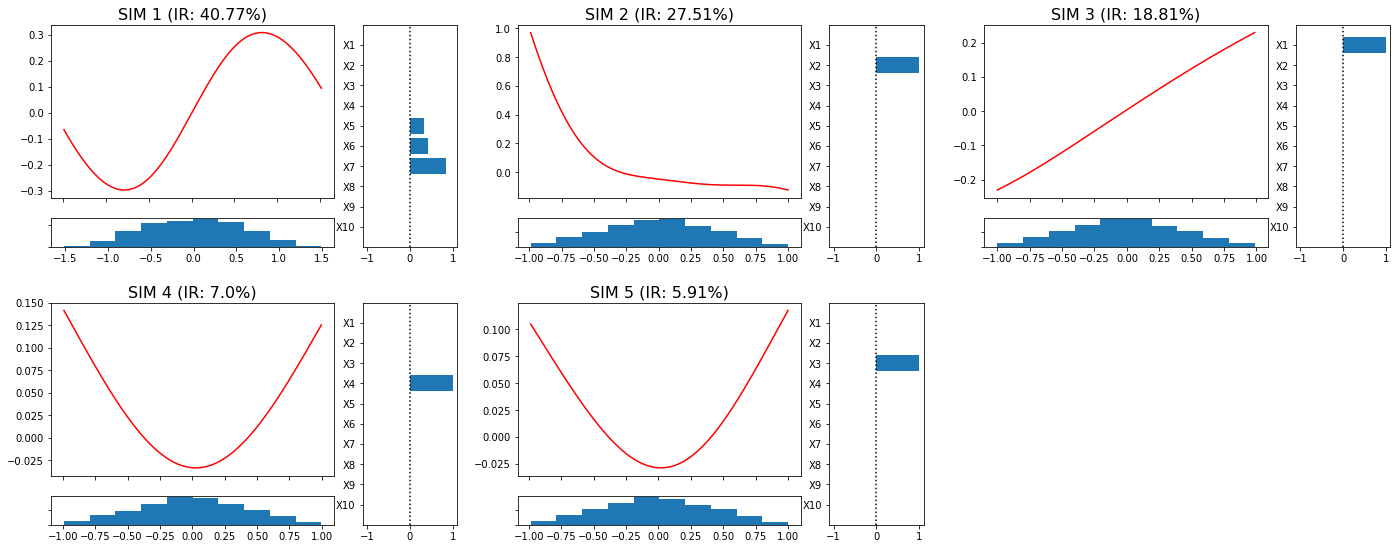

In [2]:
model.visualize_new(cols_per_row=3, folder="./", name="exnn_demo")

In [3]:
model.projection_indices_

AttributeError: 'ExNN' object has no attribute 'projection_indices_'